# Background
The dataset is for a US bank called AllLife Bank that aims to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

# Objective
* Data preprocessing and EDA using descriptive statistics and visualizations.
* Build the logistic regression model to predict whether a liability customer will buy a personal loan or not
* Build the Decsion Tree model and comment on the model performance. 
* Compare decision tree and Logistic regression 
* Generate a set of insights and conclude with the key takeaways that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan and which segment of customers should be targeted more.

# Key Questions to be Answered
* Can data be cleaned and using Exploratory Data Analysis with descriptive statistics and visualizations, can we come across the key variables that have a strong relationship with the dependant variable (Personal_Loan)?
* Which metric is right for model performance evaluation and why? 
* Can model performance be improved?
* what would your advice to the marketing team on how to do this campaign and increse the success ratio?

# Dataset 
The data contains the different attributes of liability customers . The detailed data dictionary is given below.
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot, scikit-learn

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# installing Zipcodes library 
!pip install --upgrade uszipcode 
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False) # set simple_zipcode=False to use rich info database
import uszipcode as zcode # to get zipcodes

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

### Load the dataset 

In [3]:
# loading the dataset
data = pd.read_csv("Loan_Modelling.csv")

### View the first 10 rows of the dataset


In [4]:
data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### View the last 10 rows of the dataset

In [4]:
data.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### Let's view a sample of the data

In [5]:
# setting the random_state will ensure we get the same results every time
data.sample(n=10,random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


### Check the shape of the dataset

In [6]:
# checking the shape of the data
data.shape

(5000, 14)

### Observation: 
We have 5000 observations of 14 columns

### Check the data types of the columns in the dataset.

In [7]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observation: 
* The dependant vraiable is Personal_Loan which describe whether the person has taken loan or not. This is of int type . 
* Independant variable, CCAvg is of float type
* The rest of the independant variables are all of int type
* There are no missing values in the dataset 

In [8]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [9]:
# checking for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
### To check if there are any duplicate values in the dataset 
df.duplicated().sum()

0

### Summary of the data

In [11]:
# Let's look at the statistical summary of the data
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observation
* Maximum professional experience of the customers is 43 years. However, Minimum experience is in negative (-3 years) which doesn't look correct. We have to preprocess this column data to remove the negative values. 
* Age of customers range from 23 years to 67 years. And 75% of customers are of age 55 years.
* Annual Income data is slightly right skewed. Minimum annual income is \\$8K and 75% of of customers have annual income of \\$98K. But Maximum annual income is \\$224K whcih looks like an outlier and need to be looked into further.
* Value of House Mortgage ranges from \\$0 to \\$635K, where 75% of customers have house Mortagage of \\$101K

## Data Preprocesing 

#### We can drop the ID column as it is not relevant for modeling

In [12]:
# drop ID column 
df.drop(['ID'],axis=1,inplace=True) 

In [13]:
df.columns 

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [14]:
# To print the unique values 
col = [
    "Family",
    "Education",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "Personal_Loan",
]

# Printing number of count of each unique value in each column
for column in col:
    print(df[column].value_counts())
    print("Unique values are:", df[column].nunique())
    print("-" * 40)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Unique values are: 4
----------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
Unique values are: 3
----------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
Unique values are: 2
----------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
Unique values are: 2
----------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
Unique values are: 2
----------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
Unique values are: 2
----------------------------------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
Unique values are: 2
----------------------------------------


#### Observations:
* Only 9% customers are converted Personal loaan customers and ~91% customers are not. So, success ratio of conversion rate is only 9%. There is an imbalance in dependant data that should be addressed when building the model. 
* Largest number (~30%) of the 5000 customers are single family.
* Largest number(41%) of the customers have undergrad education. 
* We can see that the distribution of classes in the target variable is imbalanced i.e., only 9% observations are successfully converted to purchae_loan customers.


#### ZIPCode Feature Engineering using 'uszipcode' library 

#### Let's get the number of unique values and unique values of ZIPCode column 

In [15]:
df['ZIPCode'].nunique()

467

There are 467 unique ZIPCodes

In [16]:
zipcodes = df['ZIPCode'].unique()

In [17]:
# Mapping ZIPCodes to it's respective county 
county=[]
for i in np.arange(0,len(df['ZIPCode'])):
    zipcode = search.by_zipcode(df['ZIPCode'][i])
    county.append(zipcode.county)
df['County']=county
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [18]:
# Get the number of unique values of new ZIPCode mapped County column
df['County'].nunique()

38

In [19]:
# Mapping ZIPCodes to it's respective city
city=[]
for i in np.arange(0,len(df['ZIPCode'])):
    zipcode = search.by_zipcode(df['ZIPCode'][i])
    city.append(zipcode.major_city)
df['City']=city
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,City
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,Pasadena
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,Berkeley
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,San Francisco
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,Northridge


In [20]:
# Get the number of unique values of new ZIPCode mapped City column
df['City'].nunique()

244

#### We observed some negative values in Experience data column. Let's do Imputation of these negative values in  Experience column 

In [21]:
# To get the count of negative Experience values 
df[df['Experience']<0]['Experience'].count()

52

#### Observation:
There are in total 52 negative Experience values in the dataset that is incorrect and should be imputed 

#### Let's check the relation between negative Expierence values and other columns in the dataset 

In [22]:
df[df['Experience']<0].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,52.0,NaN,NaN,NaN,24.519231,1.475159,23.0,24.0,24.0,25.0,29.0
Experience,52.0,NaN,NaN,NaN,-1.442308,0.639039,-3.0,-2.0,-1.0,-1.0,-1.0
Income,52.0,NaN,NaN,NaN,69.942308,37.955295,12.0,40.75,65.5,86.75,150.0
ZIPCode,52.0,NaN,NaN,NaN,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.0,95842.0
Family,52.0,NaN,NaN,NaN,2.865385,0.970725,1.0,2.0,3.0,4.0,4.0
CCAvg,52.0,NaN,NaN,NaN,2.129423,1.750562,0.2,1.0,1.8,2.325,7.2
Education,52.0,NaN,NaN,NaN,2.076923,0.83657,1.0,1.0,2.0,3.0,3.0
Mortgage,52.0,NaN,NaN,NaN,43.596154,90.027068,0.0,0.0,0.0,0.0,314.0
Personal_Loan,52.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Securities_Account,52.0,NaN,NaN,NaN,0.115385,0.322603,0.0,0.0,0.0,0.0,1.0


#### Observation:
We see customers aging in the range of 23 ~ 29 years old have negative Experience. So negative experience for these Age customers might be a mistake. We can correct it by taking the absolute of these negative Experience values  


In [23]:
df.loc[df['Experience']<0,'Experience']=np.abs(df['Experience'])
#Since dropping 68 rows with 0 Mileage will be huge loss of data, let's fill the outliers with the median
# Below code will print median of Mileage column 
#print("Median of Mileage column=",df1['Mileage_kmpl/kmperkg'].median())
#Filling 0 Mileage values with median
#df1["Mileage_kmpl/kmperkg"].replace({0.0:18.155},inplace=True)

In [24]:
# rechecking if the negative values in Experience are imputed to positive values 
df[df['Experience']<0]['Experience'].nunique()

0

In [25]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.1346,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,NaN,NaN,NaN,93169.257,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,NaN,NaN,NaN,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,NaN,NaN,NaN,1.881,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,NaN,NaN,NaN,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,NaN,NaN,NaN,0.096,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,NaN,NaN,NaN,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0


#### Observation:
Minimum Exeperience is no longer negative 

## EDA

## Univariate Analysis 

In [26]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observation on Age

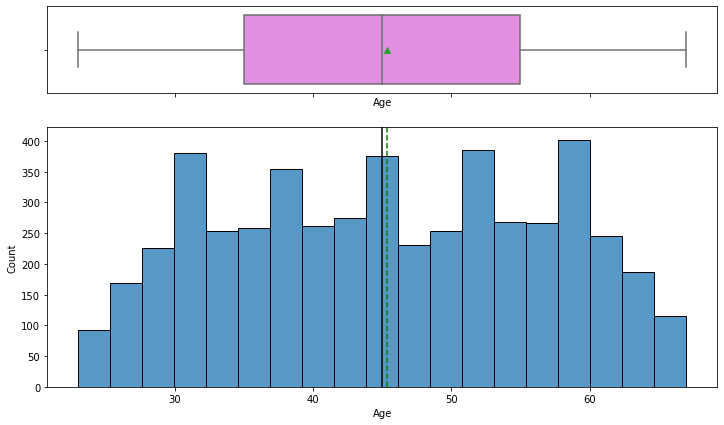

In [27]:
histogram_boxplot(df, "Age")

#### Observation
* Age data distribution is normally distrbuted and average age is 45 years old
* There are 0 outliers 

### Observation on Experience 

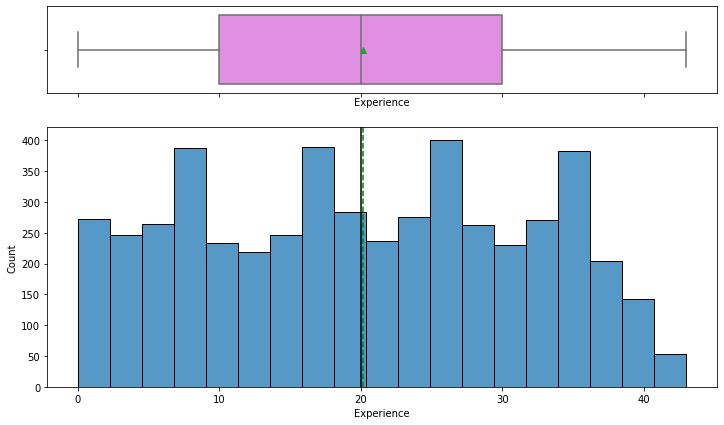

In [28]:
histogram_boxplot(df, "Experience")

##### Observation
* Experience data distribution is also normally distributed with average Experience of the customers at 20 years. 
* There are 0 outliers 

### Observation on Income

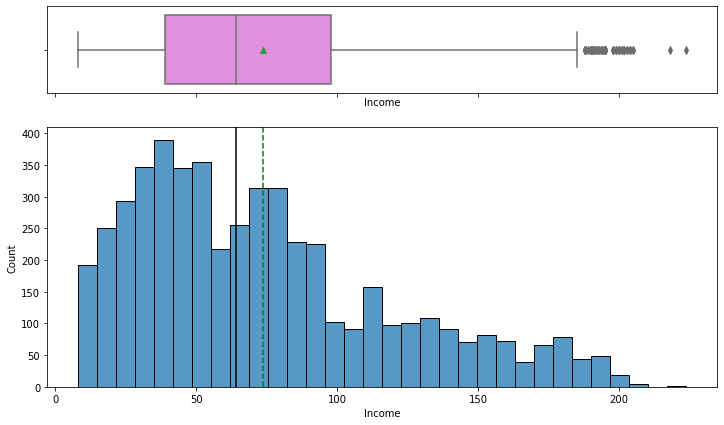

In [29]:
histogram_boxplot(df, "Income")

#### Observation
* Income distribution is slightly right skewed with average annual income of ~ 70K dollars. Outliers are on the higher side.
* There are couple of max outliers greater than 220K dollars which can be dropped.


### Observation on CCAvg

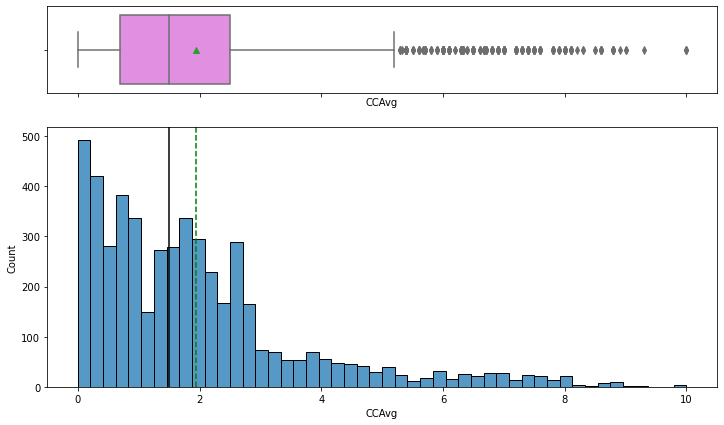

In [30]:
histogram_boxplot(df, "CCAvg")

#### Observation
* CCAvg distribution is slightly right skewed and average spending of Credit Card per month is ~2K dollars
* Outliers are are on the higher end. And the max outlier is at 10K which can be dropped. 

### Observation on Mortgage

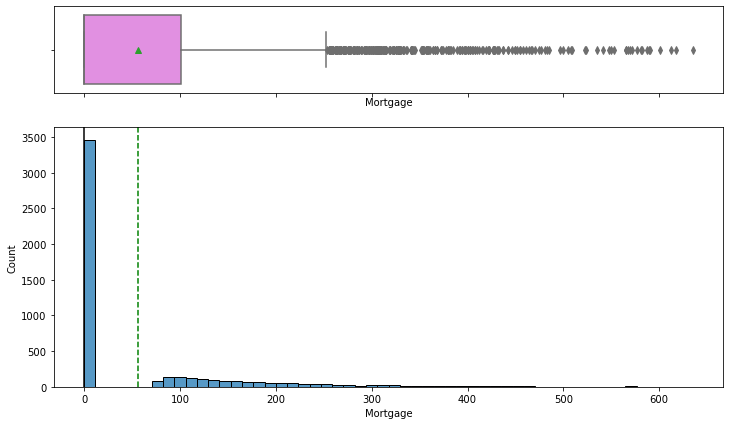

In [31]:
histogram_boxplot(df, "Mortgage")

#### Observation
* The Mortgage distribution is right skewed. Not many customers have mortgage. On an average, customers have mortgage amount of \\$55K .
* Outliers are on the higher end. One big outlier is mortgage amount of more than $600000 which can be dropped.

Features like 'Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode', 'Education','County' that are 
are of int/float type are actually of categorical type with classes. 
So, it would be best to convert these into categorical type. 

In [32]:
# converting features with classes into categorical type
cat_col = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'Education','ZIPCode','County']
df[cat_col] = df[cat_col].astype('category')
    

In [33]:
# Checking if the conversion from int/float type to Category type is done successfully. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  County              4966 non-null   category
 14  City                4966 non-null   object  
dtypes: category(9), float64(1), int64(4), 

In [34]:
# function to create labeled barplots for categorical columns 


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
   
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
            
        )  # annotate the percentage  
    plt.show()  # show the plot


### Observation on Family 

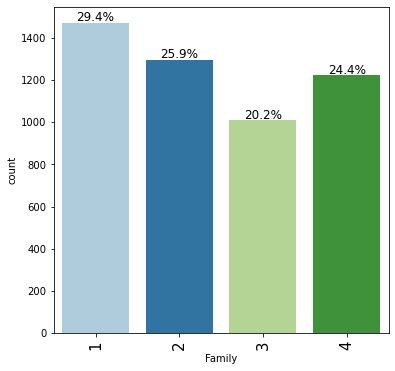

In [35]:
labeled_barplot(df, "Family", perc=True)

### Observation
* Highest percentage of customers are single (29.4%) and the least percentage of customers with family size of 3. 

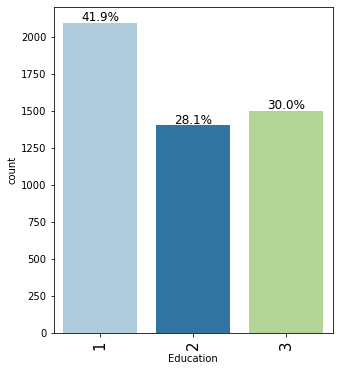

In [36]:
labeled_barplot(df, "Education", perc=True)

### Observation
* Highest percentage of customers are Undergrad (41.9%), followed closely by Advanced/Professional (30.0%) and Graduates(28.1%) 

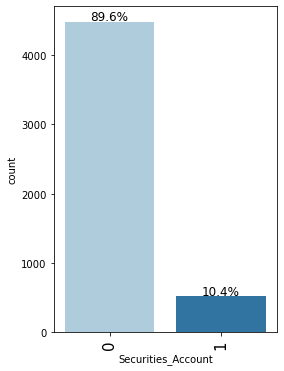

In [37]:
labeled_barplot(df, "Securities_Account", perc=True)

### Observation
Highest percentage of customers (89.6%) do not have securities account with the bank. 

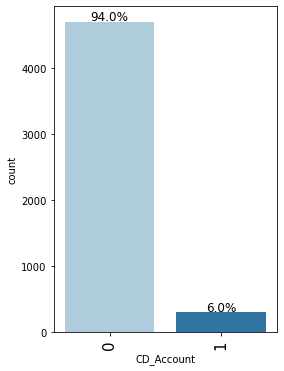

In [38]:
labeled_barplot(df, "CD_Account", perc=True)

### Observation
Highest number of customers (94%) DO NOT have CD (cerrtificate of Deposit) account with the bank

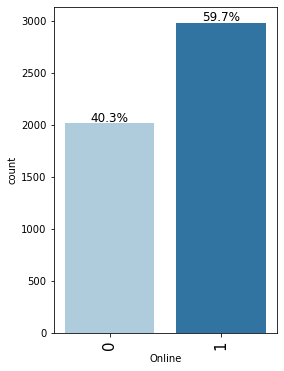

In [39]:
labeled_barplot(df, "Online", perc=True)

### Observation
Highest percentage of customers (59.7%) use Internet banking facilities. 

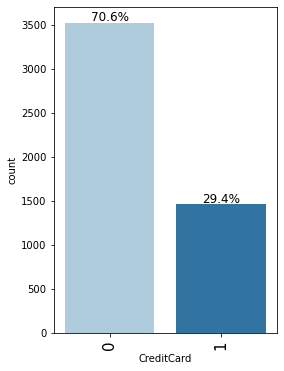

In [40]:
labeled_barplot(df, "CreditCard", perc=True)

### Observation
Highest percentage of customers (70.6%) DO NOT use credit card issued by any other bank. 

## Bivariate Analysis

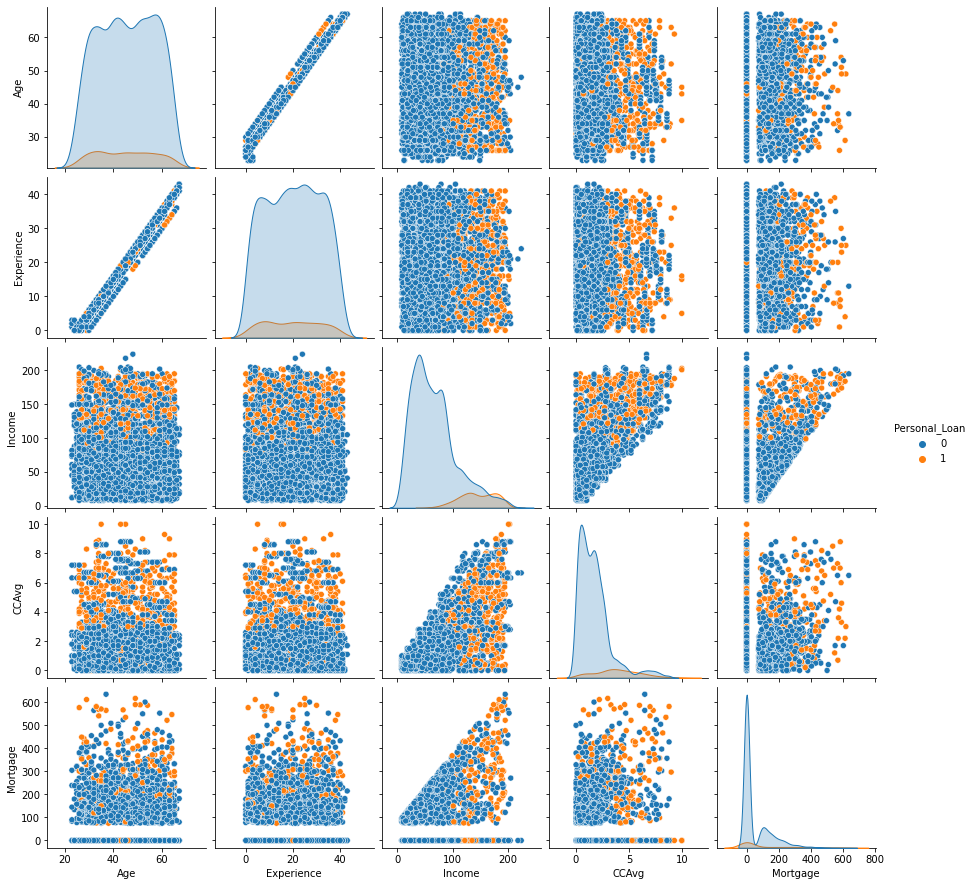

In [41]:
sns.pairplot(df, hue="Personal_Loan")
plt.show()

### Observation
There are overlaps i.e., no clear distinction in the distribution of variables for customers who accept Personal Loan and not accept Personal loan 
Let's explore this further with the help of other plots.

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Personal_Loan vs Age

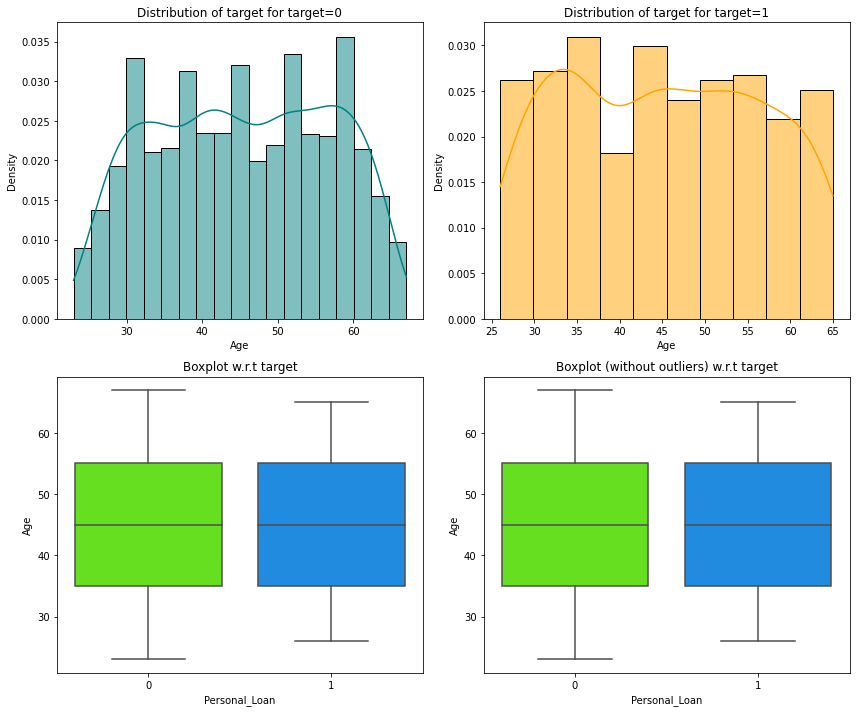

In [43]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

#### Observation
* Age distribution for customers accepting Personal_Loan and not accepting Personal_Loan is normally dustributed.
* We can see that the median age of customers accepting the Personal_Loan is same as the median age of customers not accepting the Personal_Loan.
* 75% of the customers are in the age group of 31 to  60 years old
* There are 0 outliers in boxplots of both class distributions

In [44]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County', 'City'],
      dtype='object')

### Personal_Loan vs Experience 

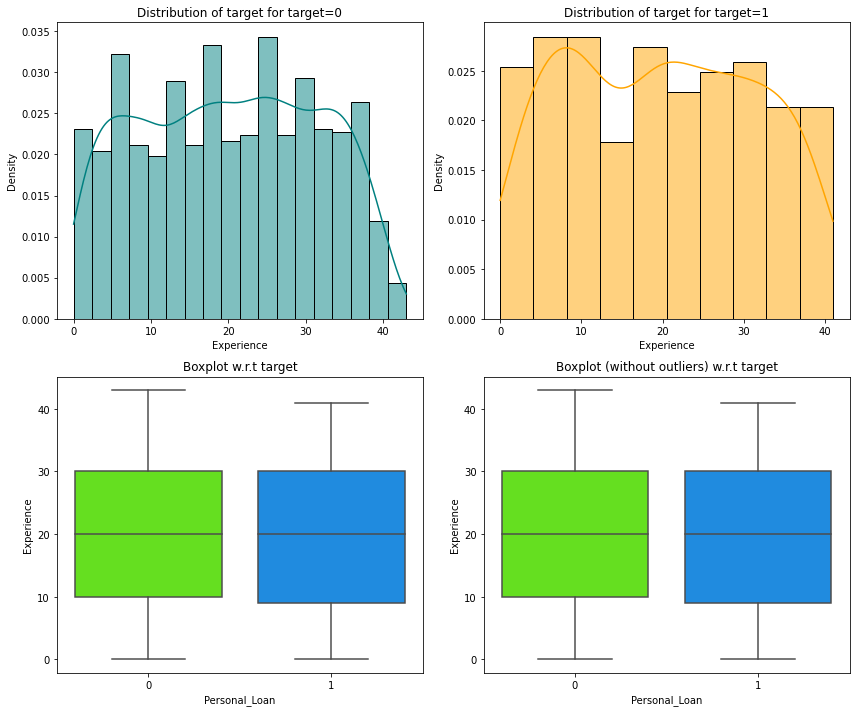

In [45]:
distribution_plot_wrt_target(df, "Experience", "Personal_Loan")

#### Observation
* Experience distribution of customers accepting Personal_Loan  and not accepting Personal_Loan is normally dustributed
* The median experience of customers accpeting Personal Loan is same as the customers NOT accepting personal Loan.
* The second Quartile of Experience of customers accepting Personal_Loan is slightly more than the second Quartile of Expereince of customers NOT accepting Personal_Loan on the lower end.
* This shows that customers with lesser experience are more likely to accept Personal Loan 
* There are 0 outliers in boxplots of both class distributions

### Personal_Loan vs Income 

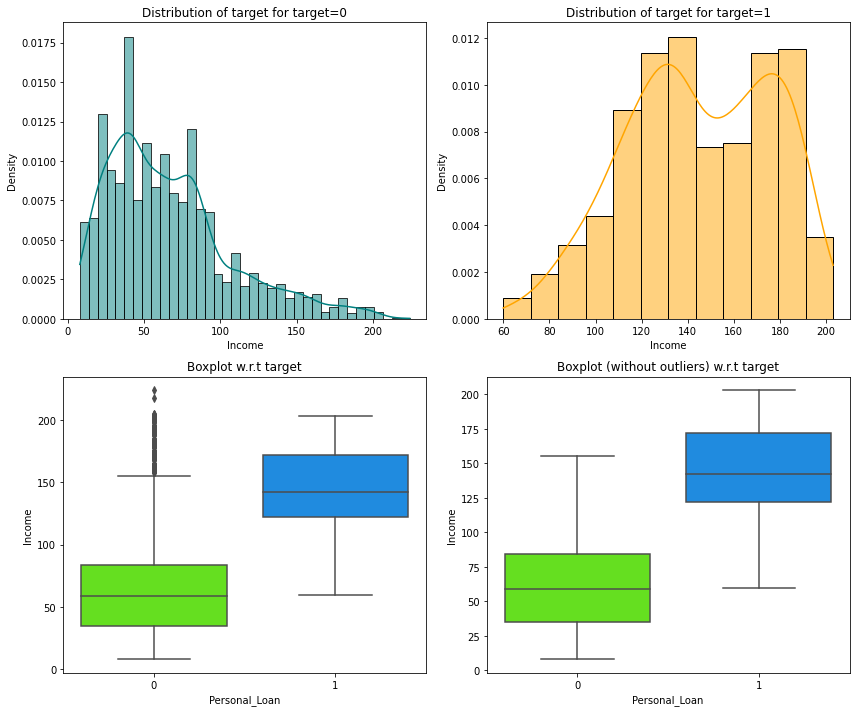

In [46]:
distribution_plot_wrt_target(df, "Income", "Personal_Loan")



#### Observation
* Distrbution of Income of customers NOT accepting a Personal_Loan is right skewed
* Distrbution of Income of customers accepting a Personal_Loan is Left skewed
* We can see that the third quartile of Income of customers accepting Personal_Loan is much more than the third quartile
of Income of customers NOT accepting Personal_Loan. 
* This shows that customers with high Income are more likely to accept Personal_Loan . 

### Personal_Loan vs Mortgage

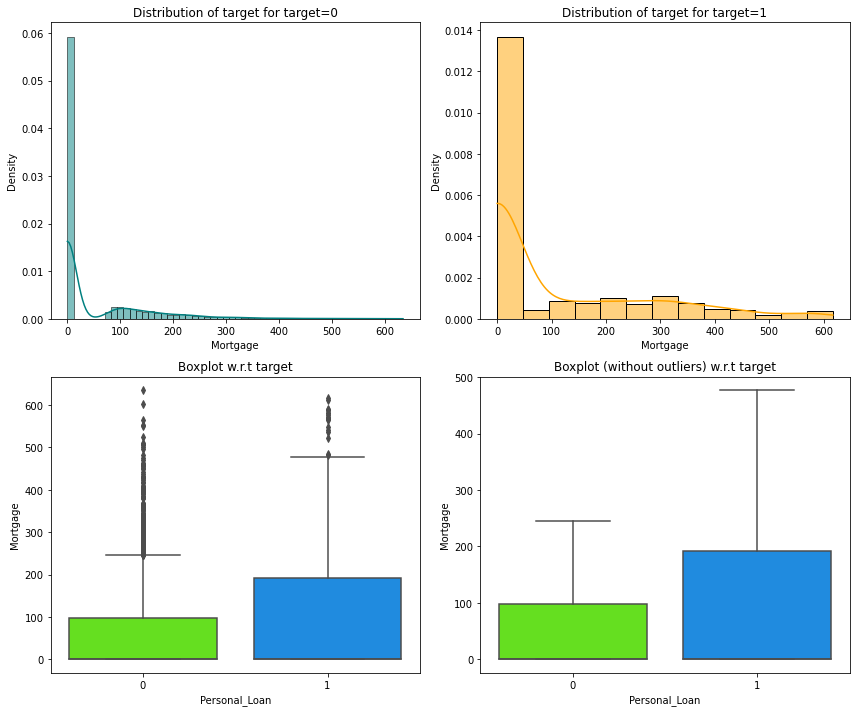

In [47]:
distribution_plot_wrt_target(df, "Mortgage", "Personal_Loan")

#### Observation
* Customers with higher Mortgage more likely to accept Personal Loan 

### Personal_Loan vs CCAvg

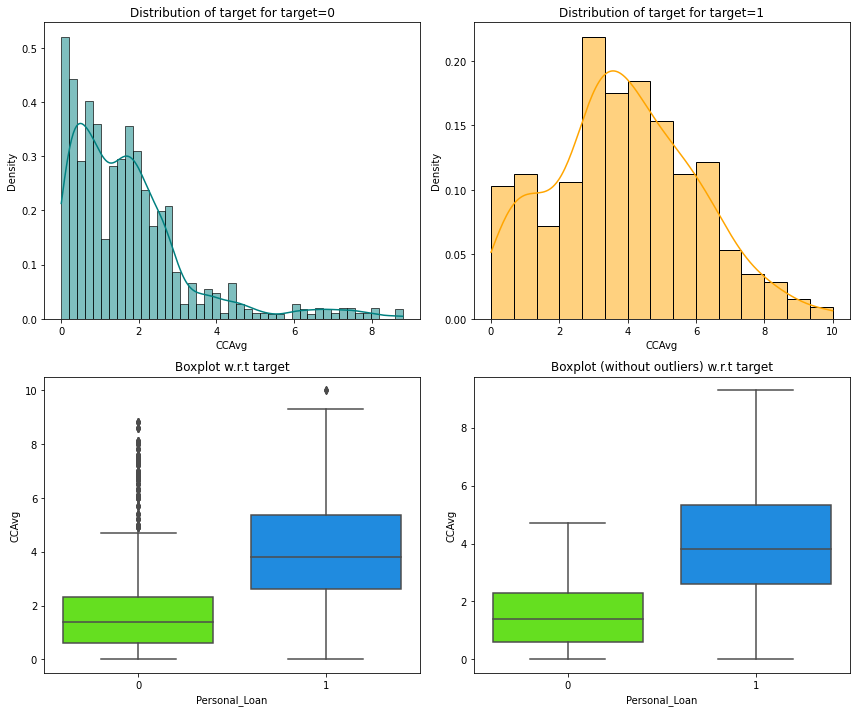

In [48]:
distribution_plot_wrt_target(df, "CCAvg", "Personal_Loan")


#### Observation
* We can see that the second and third quartiles of average spending of credit card per month is more for customers accepting Personal Loan than the 
customers not accepting Personal Loan
* This shows that customers with higher average spending of credit card per month  are more likely to accept Personal_Loan. 
* But there are more outliers for customers with average spending of credit card per month and not accepting personal loan. 

In [49]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Personal_Loan vs Family 

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


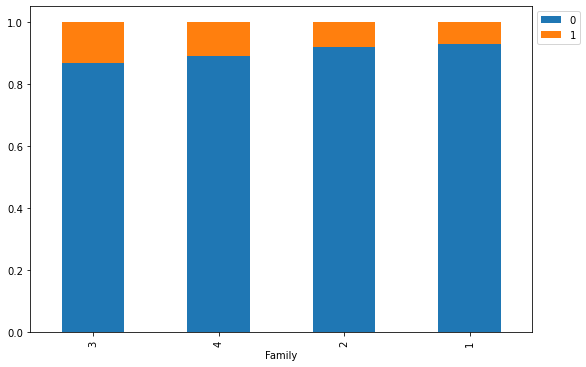

In [50]:
stacked_barplot(df, "Family", "Personal_Loan")

#### Observation
* In the previos plot, we have seen that higher percentage of customers are single and least percentage of customers are family size of 3. 
This plot shows that customers with family size of 3 are more likely to accept Personal Loan and single customers are less likely to accept Personal Loan

### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


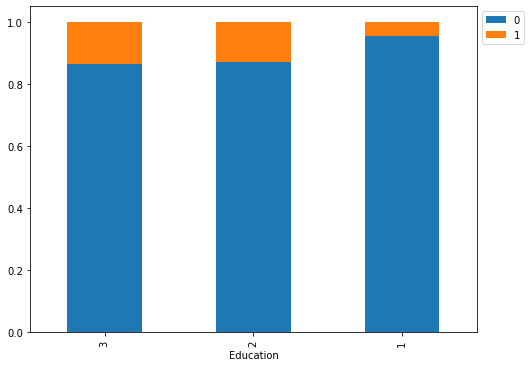

In [51]:
stacked_barplot(df, "Education", "Personal_Loan")

#### Observation
* In the previous plot we have seen that the highest percentage of customers are Undergrads. But in this plot we see that
Graduates and Advanced/professional are more likely to accept Personal Loan than Undergrads. 

### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


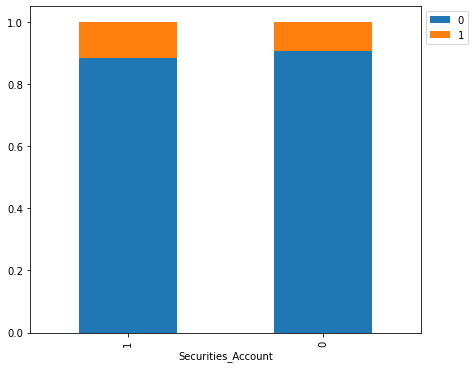

In [52]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

#### Observation
In the previous plot we saw that highest percentage of customers DO NOT have Secuirities Account with the bank. But in
this plot we see that customers who DO HAVE Securities Account with the bank are more likey to accept Perosnal Loan.

### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


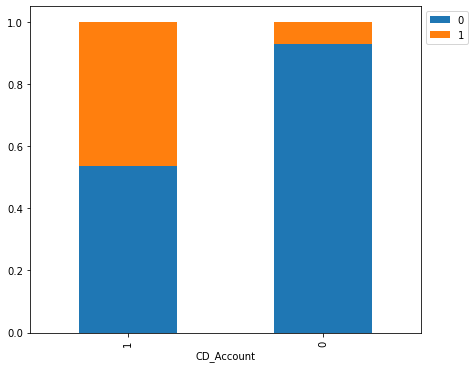

In [53]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

#### Observation
In the previous plot we have seen that highest percentage of customers do not have CD (Certificate of Deposit) with the bank.
But in this plot, we see that customers who do have CD with the bank are more likely to accept the Personal Loan 

### Personal_Loan vs Online 

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


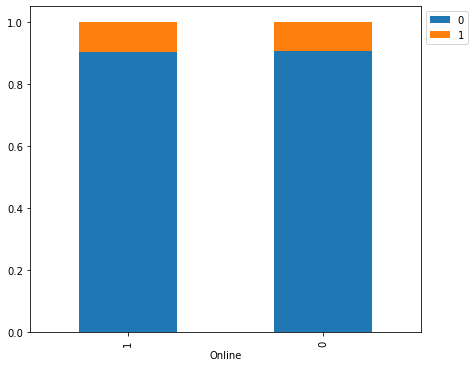

In [54]:
stacked_barplot(df, "Online", "Personal_Loan")

#### Observation
Customers who purchased a loan in the last campaign are using internet banking facilities.

### Personal_Loan vs CreditCard 

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


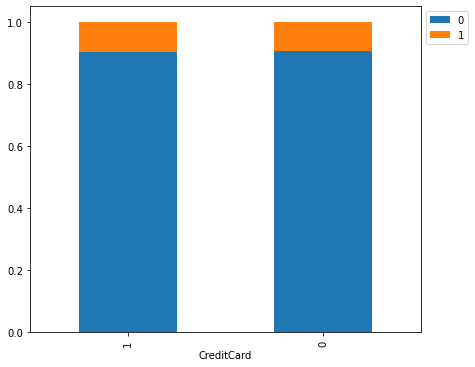

In [55]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

#### Observation
In the previous plot we have seen that highest percentage of customers do not have credit card issued by any other bank. But 
in this plot we see that having Credit card  from other bank doesn't really influence accepting Personal Loan with our bank.

### Personal_Loan vs County 

<AxesSubplot:ylabel='County'>

<Figure size 1440x1800 with 0 Axes>

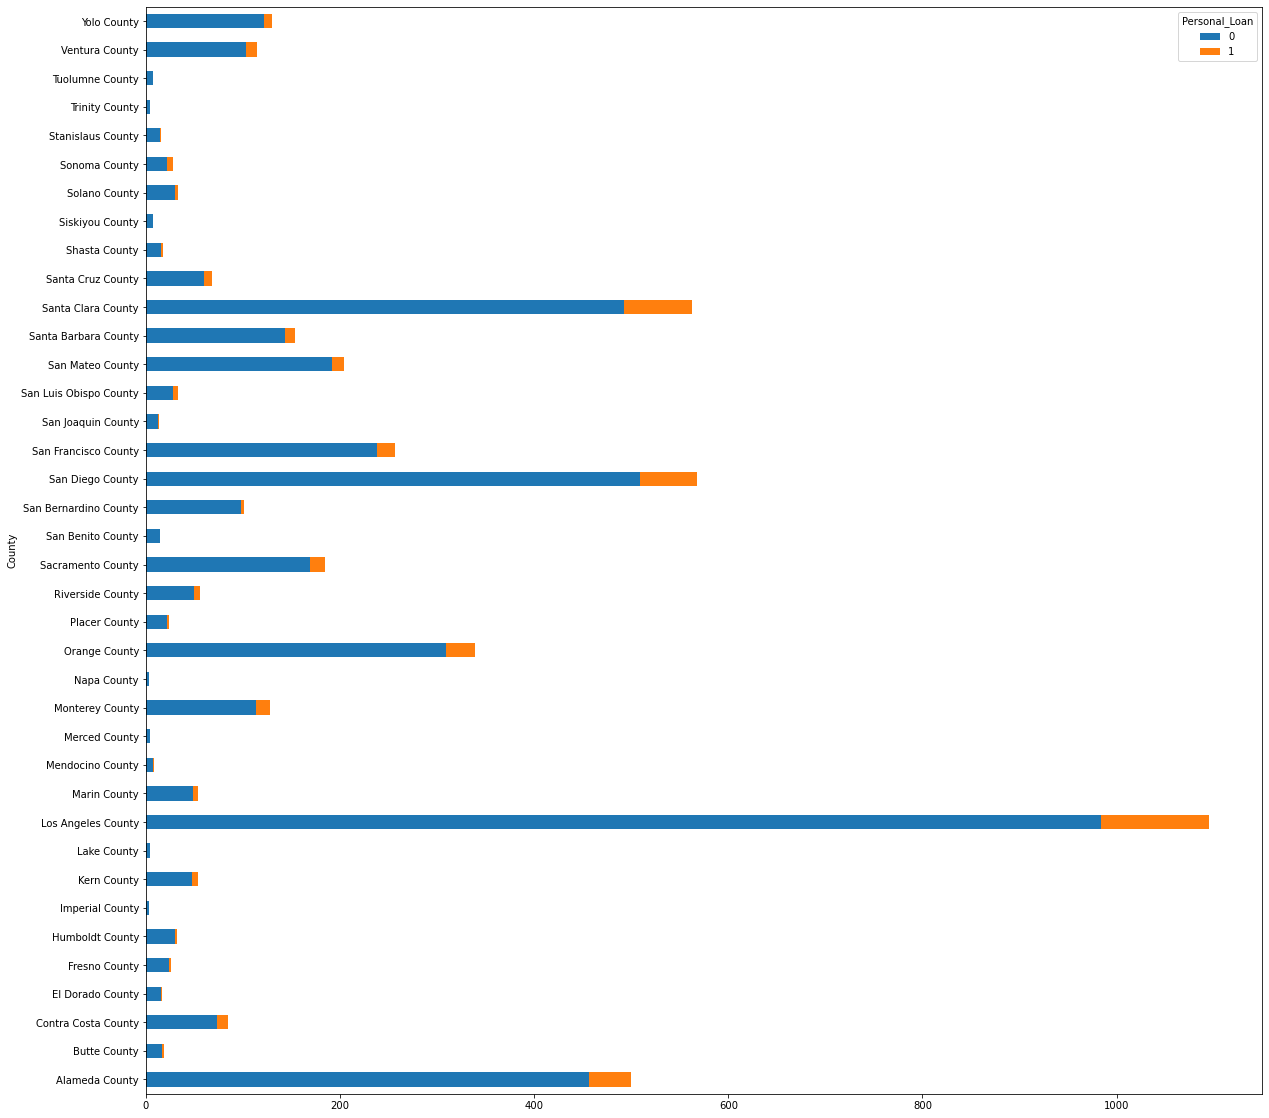

In [56]:
# To get tabular data with counties Vs Personal_Loan
#pd.crosstab(index=df["County"],columns=[df["Personal_Loan"].sort_values(ascending=True)]) 
plt.figure(figsize=(20,25))
pd.crosstab(index=df['County'],columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(20,20))

#### Observation 
* Since all of the counties are from California State. There are 38 unique counties. 
* Los Angeles County has highest number of customers opting for Personal Loan 

### MultiVariate Analysis
### Let's check for correlations between the columns¶

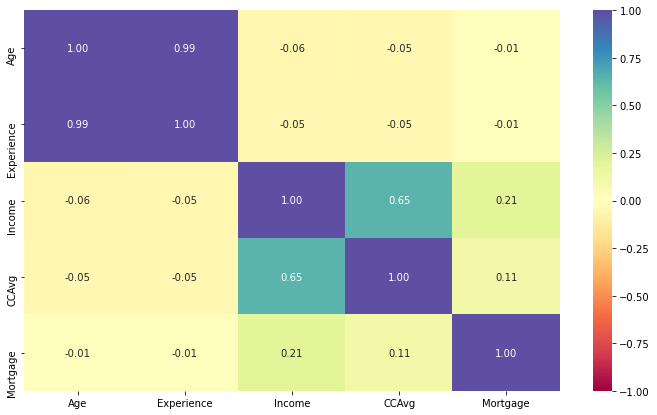

In [57]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation 
* As expected, Age and Experience are highly positively correlated  with each other. So, for modeling we can drop one of these two variables to avoid Multi
Co-linearity issue. 
* Income and CCAvg are  positively correlated with each other to some extent. This is expected, because customers with higher income are more likely to have higher average spending of credit card per month. 
* Income, CCAvg and Mortgage have low negative correlation with Age & Experience. This means that, higher Age/ more years of professionsl Expereince means they are less likely to have lower or 0 mortgage and lower average credit card spending per month and may possible have lower income. May be these higher Age customers are retired from work and living on seocial security Income.  
* Mortgage has low positive correlation with Income. 


### Let's analyze the relationship between Age Vs Income with respect to Personal Loan 

<Figure size 432x288 with 0 Axes>

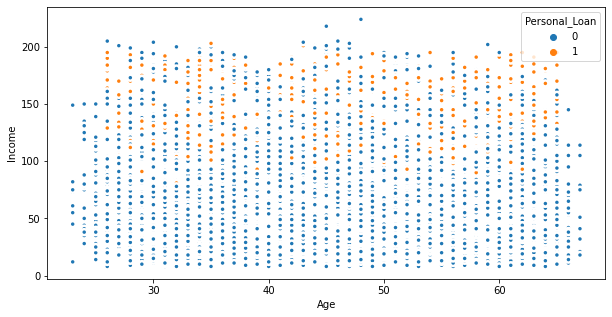

In [58]:
feature = ['Age']
list(enumerate(feature))
fig = plt.figure()
plt.figure(figsize=(10,5))
total = len(df[feature])  # length of the column
for i in enumerate(feature):
    plt.subplot(1,1,i[0]+1) # plot 3 subplots in 2 rows and 2 columns
    ax = sns.scatterplot(x=df[i[1]], y='Income',hue = 'Personal_Loan',data=df,linewidth=2.5)
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        plt.tight_layout()
        plt.title(i)
        plt.title('{}'.format(i),fontsize=14,fontweight='bold')

#### Observation
* Customers with Income > 100K USD accepted Personal Loan in the last campaign.
* Ratio of customers accepting personal loan is larger between age 25 ~ 35 and 55 ~ 65. 

### Let's analyze the relationship between Mortgage Vs Income with respect to Personal Loan 

<Figure size 432x288 with 0 Axes>

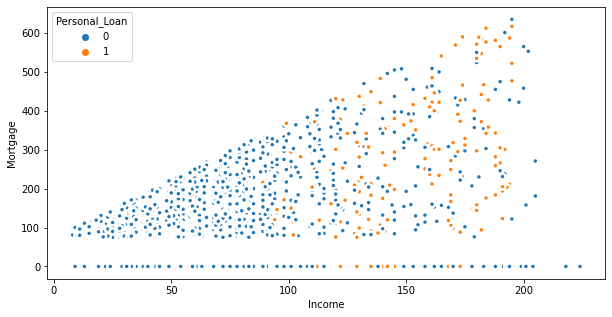

In [59]:
feature = ['Income']
list(enumerate(feature))
fig = plt.figure()
plt.figure(figsize=(10,5))
total = len(df[feature])  # length of the column
for i in enumerate(feature):
    plt.subplot(1,1,i[0]+1) # plot 3 subplots in 2 rows and 2 columns
    ax = sns.scatterplot(x=df[i[1]], y='Mortgage',hue = 'Personal_Loan',data=df,linewidth=2.5)
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        plt.tight_layout()
        plt.title(i)
        plt.title('{}'.format(i),fontsize=14,fontweight='bold')

#### Observation
Customers with higher income and higher Mortgage accepted personal loan in the last campaign.


### Let's analyze the relationship between Education Vs CCAvg with respect to Personal Loan 

<Figure size 432x288 with 0 Axes>

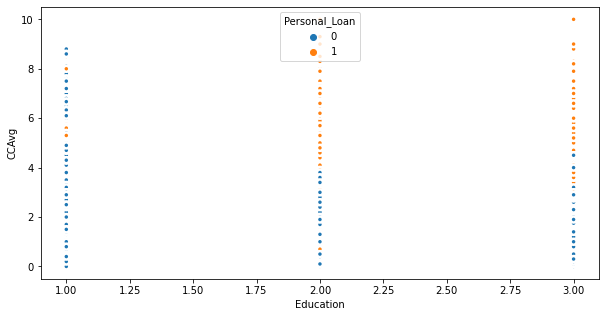

In [60]:
feature = ['Education']
list(enumerate(feature))
fig = plt.figure()
plt.figure(figsize=(10,5))
total = len(df[feature])  # length of the column
for i in enumerate(feature):
    plt.subplot(1,1,i[0]+1) # plot 3 subplots in 2 rows and 2 columns
    ax = sns.scatterplot(x=df[i[1]], y='CCAvg',hue = 'Personal_Loan',data=df,linewidth=2.5)
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        plt.tight_layout()
        plt.title(i)
        plt.title('{}'.format(i),fontsize=14,fontweight='bold')

#### Observation 
Customers with Higher Education (Graduate and Advanced/Professionals) have higher monhtly credit card spending and are more likely to have accepted Personal loans.

### Summary of Insights from EDA 

#### Data Description
* There are NO duplicate and missing values in the dataset. 
* Dependent variable is the Personal_loan which is of categorical data type.
* Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type

#### Data Preprocessing before EDA:
* There were some negative values in the Experience which were incorrect. So, we imputed the negative values by taking their absolute values and converted into positive data.
* There are 450 unique zipcode. We mapped it to counties. 

#### Insights 
* Personal Loan has positive correlation with Income, Mortgage, CCAvg, CD Account, Savings_Account, family and Education.
* Customers with Higher Education (Graduate and Advanced/Professionals) have higher monthly credit card spending and are more likely to have accepted Personal loans.
* Customers with higher income have higher mortgage.
 


### Data Preprocessing after Exploratory Data Analysis  

### Handling Outliers 


#### Based on the EDA plots, we saw extreme  outliers in Income data (>\\$224K). We can drop these extreme values.


In [61]:
# First let's make a copy of the data for preprocessing
df1 = df.copy()

In [62]:
#removing outlier >= 224K USD in Income data
df1.drop(df1[df1['Income'] >= 224].index, axis=0, inplace=True)

#### Based on the EDA plots, we saw extreme outliers in Mortgage data > $600000 which can be dropped.

In [63]:
#removing outlier >= 600K USD in Mortgage data
df1.drop(df1[df1['Mortgage'] >= 600].index, axis=0, inplace=True)

#### Based on the EDA plots, we saw extreme outliers in Average monthly credit card spending, CCAvg data > 10K USD which can be dropped.

In [64]:
#removing outlier >= 10K USD in CCAvg data
df1.drop(df1[df1['CCAvg'] >= 10].index, axis=0, inplace=True)

In [65]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4992.0,45.343149,11.467735,23.0,35.0,45.0,55.0,67.0
Experience,4992.0,20.141026,11.418460,0.0,10.0,20.0,30.0,43.0
Income,4992.0,73.572716,45.792266,8.0,39.0,64.0,98.0,218.0
CCAvg,4992.0,1.931014,1.735276,0.0,0.7,1.5,2.5,9.3
Mortgage,4992.0,56.095553,100.540189,0.0,0.0,0.0,101.0,590.0


We have handled the extreme outliers in Income, Mortgage and CCAvg data


In [66]:
# rechecking for the missing values 
df1.isnull().sum()

Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
County                34
City                  34
dtype: int64

We are left with missing values for 'County' column. Let's Create a New Category (called Unknown) for these NAN Values

#### Imputing missing values in County col with 'Unknown' new category value

In [67]:
# Replace NAN value with a new name (here we create a new category as Unknown).                                                                  
#1. Function to impute null value with new category
def impute_nan_create_category(data,ColName):
     data[ColName] = np.where(data[ColName].isnull(),"Unknown",data[ColName])
## Call function to create new category for variables
for Columns in ['County']:
    impute_nan_create_category(df1,Columns)
#2. Display result
df1[df1['County']=='Unknown'].head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,City
106,43,17,69,92717,4,2.9,1,0,0,0,0,1,1,Unknown,None
172,38,13,171,92717,2,7.8,1,0,0,0,0,1,0,Unknown,None
184,52,26,63,92717,2,1.5,2,0,0,1,0,1,0,Unknown,None
321,44,20,101,92717,3,4.4,2,82,1,0,0,0,0,Unknown,None
366,50,24,35,92717,1,0.3,3,0,0,0,0,1,0,Unknown,None


### Variable Transformations 

Mortgage data is skewed . We will apply the log transformation to this columns to deal with skewness in the data for better visualization¶

In [68]:
# creating a temporary copy of the dataframe 
df_temp = df1.copy()

In [69]:
# using log transforms on Mortgage column
skew_dist_col = ['Mortgage']
for col in skew_dist_col:
    df_temp[col + "_log"] = np.log(df_temp[col] + 1)

#### Let's check for skewness after applying the log transformation

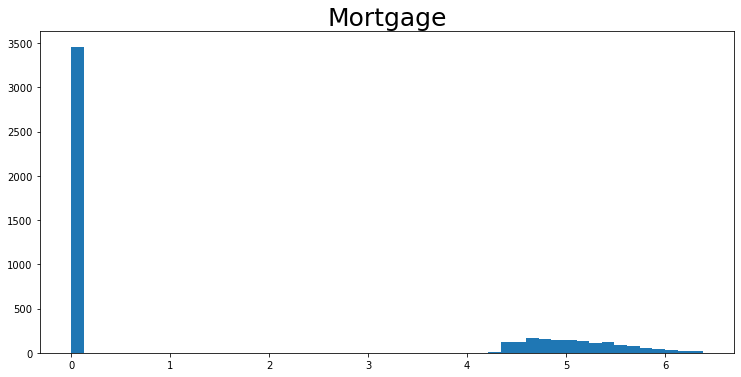

In [70]:
# creating a list of skewed distributed cols
skew_dist_col = ['Mortgage']

# let's plot histogram of the skewed dist columns
plt.figure(figsize=(30, 5))

for i in range(len(skew_dist_col)):
    plt.subplot(1, 3, i + 1)
    plt.hist(df_temp[skew_dist_col[i]+'_log']
             ,bins=50)  
    plt.tight_layout()
    plt.title(skew_dist_col[i], fontsize=25)

plt.show()

#### Observation
* Log transform of Mortgage didn't really help in transforming the distribution more normal. It is still right skewed due to 
null values in the dataset. 
* The only improvement with this log transformation, is that the data is better spread out compared to it's orginal. 
* Hence, using the log transformed of Mortagge data will not help much in the data modeling.  


### Summary from EDA

#### Data cleaning after EDA 
* There were extreme outliers in Mortgage, Income and CCAvg data columns which we dropped. 
* There were null values in the County Column. We mapped these to a new category column called Unknown 
* The Mortgage data was heavily right skewed mainly due to null values. We tried the log transformation for better visualization 
of this data. However, log transformation didn't help much to transform it into more towards normal. It is still right skewed. 

#### Observations:

* People with higher income purchased personal loan in the last campaign.
* People with high mortgages opted for loan.
* Customers with higher average monthly credit usage have purchased loan.
* Customers with Family of 3 and 4 members had borrowed the loans with the bank.
* Education level 2: Graduate and 3: Advanced/Professional have borrowed loans with the bank.
* Customers who had certificate of deposit with the bank had previously borrowed loan
* Majority of customers who did have Personal loan with the bank used Online facilities.
* Majority customers who had take personal loan before are from LosAngeles region.
* Ratio of borrowing loan is high between 25 ~ 35 and 55  ~ 65


## Logistic Regression Model 

### Data Preparation 

In [71]:
# Let's first make a new dataframe for modeling by making a copy 
df2 = df1.copy()

In [72]:
#Let's drop columns which we don't need for modelling
df2.drop(columns=["ZIPCode","City",'Experience'], inplace=True)


In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4992 non-null   int64   
 1   Income              4992 non-null   int64   
 2   Family              4992 non-null   category
 3   CCAvg               4992 non-null   float64 
 4   Education           4992 non-null   category
 5   Mortgage            4992 non-null   int64   
 6   Personal_Loan       4992 non-null   category
 7   Securities_Account  4992 non-null   category
 8   CD_Account          4992 non-null   category
 9   Online              4992 non-null   category
 10  CreditCard          4992 non-null   category
 11  County              4992 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 269.1+ KB


#### Define Dependant Variable and Spliting the data into training and test set in the ratio of 70:30 respectively 

#### Categorical independant variables like Securities_Account, CD_Account, Online, CreditCard already have binary values. So, we don't need to create dummy variables or one-hot-encoding for these categorical columns 

In [74]:
X = df2.drop("Personal_Loan", axis=1)
Y = df2["Personal_Loan"]

# creating dummy variables
oneHotCols=['Family','Education','County']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will purchase a loan but in reality the customer will not - Loss of resources
2. Predicting a customer will not purchase a loan but in reality the customer will buy - Loss of opportunity


### Which Loss is greater ? 

* Loss of opportunity will be the greater loss as the bank will be losing a potential customer.

### How to reduce this loss i.e need to reduce False Negatives ?

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.   * The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [75]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [76]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Logistic Regression Model 

In [77]:
### There are different solvers available in Sklearn logistic regression
### The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

### Finding the coefficients

In [78]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Unknown,County_Ventura County,County_Yolo County
coef,0.003588,0.058439,0.132918,0.000684,-0.899687,3.125527,-0.551375,-0.641716,0.035425,1.974904,1.56988,3.036738,3.343671,-0.079489,0.364567,-0.237392,-0.261694,-0.097313,-0.007745,0.242369,-0.003869,0.137912,-0.006145,-0.182675,-0.226739,0.12925,-0.003137,0.107498,0.07544,0.88492,-0.57737,-0.137455,-0.112363,-0.008032,-0.298599,-0.295729,0.040558,-0.987847,0.063495,0.440935,-0.141215,-0.301736,-0.025306,0.741191,0.624752,0.073393,-0.063414,-0.005037,0.451124,0.279002,0.001611


### Coefficient interpretations¶

* Coefficients of Age, Income, CCAvg, Mortgage, CD_Account, Family_2, family3, family_4 , Graduate and Advanced Education and some columns of County are positive. An increase in these will lead to an increase in chances of a customer purchasing a loan.
* Coefficients of Securities_Account, Online, CreditCard and some columns of County are negative. An increase in these will lead to a decrease in chances of a customer purchasing a loan.



###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [79]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,County_Butte County,County_Contra Costa County,County_El Dorado County,County_Fresno County,County_Humboldt County,County_Imperial County,County_Kern County,County_Lake County,County_Los Angeles County,County_Marin County,County_Mendocino County,County_Merced County,County_Monterey County,County_Napa County,County_Orange County,County_Placer County,County_Riverside County,County_Sacramento County,County_San Benito County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Joaquin County,County_San Luis Obispo County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Shasta County,County_Siskiyou County,County_Solano County,County_Sonoma County,County_Stanislaus County,County_Trinity County,County_Tuolumne County,County_Unknown,County_Ventura County,County_Yolo County
Odds,1.003595,1.060181,1.142156,1.000684,0.406697,22.771897,0.576157,0.526388,1.03606,7.205929,4.806069,20.837156,28.322898,0.923588,1.439890,0.788682,0.769747,0.907272,0.992284,1.274265,0.996138,1.147875,0.993874,0.833039,0.797129,1.137975,0.996868,1.113488,1.078359,2.422790,0.561373,0.871574,0.893720,0.992000,0.741857,0.743989,1.041392,0.372378,1.065554,1.554159,0.868303,0.739533,0.975011,2.098433,1.867783,1.076153,0.938555,0.994976,1.570076,1.321810,1.001612
Change_odd%,0.359470,6.018054,14.215634,0.068391,-59.330307,2177.189651,-42.384269,-47.361159,3.60602,620.592932,380.606938,1983.715616,2732.289764,-7.641170,43.988995,-21.131766,-23.025331,-9.272764,-0.771556,27.426460,-0.386150,14.787465,-0.612593,-16.696141,-20.287132,13.797480,-0.313163,11.348829,7.835901,142.279036,-43.862712,-12.842617,-10.628042,-0.799975,-25.814298,-25.601064,4.139221,-62.762247,6.555430,55.415926,-13.169746,-26.046668,-2.498868,109.843321,86.778335,7.615317,-6.144501,-0.502419,57.007609,32.181037,0.161204


### Coefficient interpretations

* `Age`: Holding all other features constant a unit change in Age will increase the odds of a customer purchasing a personal loan by 1.00 times or a 0.36% increase in the odds.
* `Income`: Holding all other features constant a unit change in Income will increase the odds of a customer purchasing a loan by 1.06 times or a 6.01% increase in the odds.
* `CCAvg`: Holding all other features constant a unit change in CCAvg will increase the odds of a customer purchasing a loan by 1.14 times or a 14.21% increase in the odds.
* `Mortgage`: Holding all other features constant a unit change in Mortagage will increase the odds of a customer purchasing a loan by 1.00 times or a 0.07% increase in the odds.
* `Securities_Account`: The odds of a customer, who has Securities_Account with the bank, purchasing a loan is 0.41 times less than the customer who doesn't have a Securities_Account with the bank or 59.33% fewer odds of purchasing a loan. 
* `Education`: Advanced/Professional Education will increase the odds of a customer purchasing a loan by 28 times than Undergrad. 
* `Family`: Customers with a Family size of 3 will increase the odds of purchasing a loan by 7.2 times than Single customers.
* `CD_Account`: Customers with CD account with the bank will increase the odds of purchasing a loan by 22 times than customers without CD account with the bank.
* Most overall significant variables are Income,Education, CD account ,Family and CCAvg

`Interpretation for other attributes can be made similarly.`

#### Checking model performance on training set

**Using the model with default threshold**

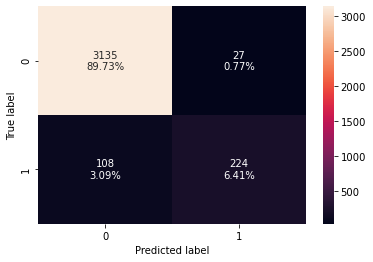

In [80]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [81]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.961362,0.674699,0.89243,0.768439


#### Checking model performance on test set

**Using the model with default threshold**

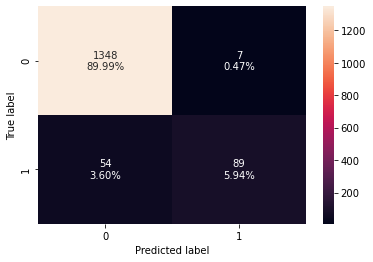

In [82]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [83]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.959279,0.622378,0.927083,0.74477


* Logistic Regression model is giving a good performance on training and test set but the recall is low.

#### ROC-AUC curve 

* ROC-AUC on training set

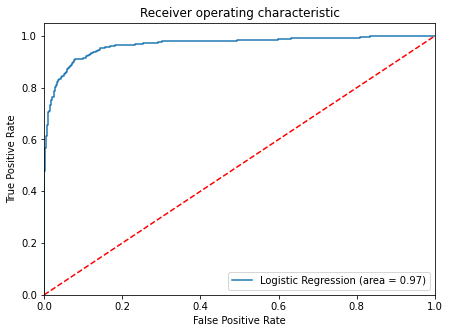

In [84]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

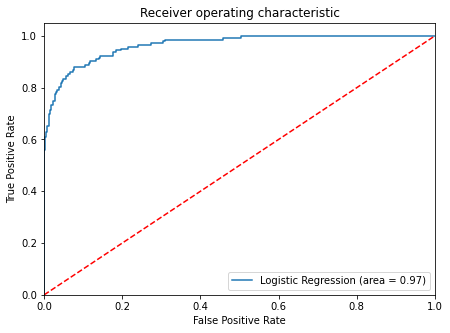

In [85]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance on Train and Test set.
* ROC-AUC score of 0.97 on training and test set is quite good.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [86]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.11573273923423591


#### Checking model performance on training set

**Using the model with threshold of 0.11**

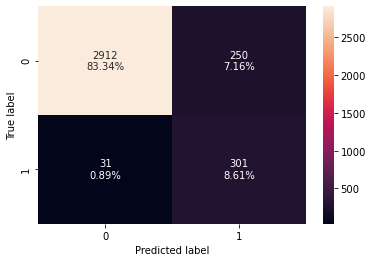

In [87]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [88]:
# checking model performance for this model on Training set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.919576,0.906627,0.546279,0.681767


#### Checking model performance on Test set

**Using the model with threshold of 0.11**

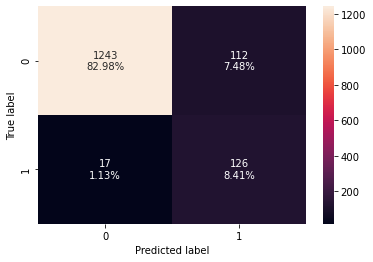

In [89]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [90]:
# checking model performance for this model on Test set
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.913885,0.881119,0.529412,0.661417


* With 0.11 Threshold, Model performance has improved significantly on training and Test set.
     * Model is giving a recall of 0.90 on the training set and 0.92 on Test set.
     * Also False negative values has decreased from 51 to 11 for test set. 

#### Let's use Precision-Recall curve and see if we can find a better threshold

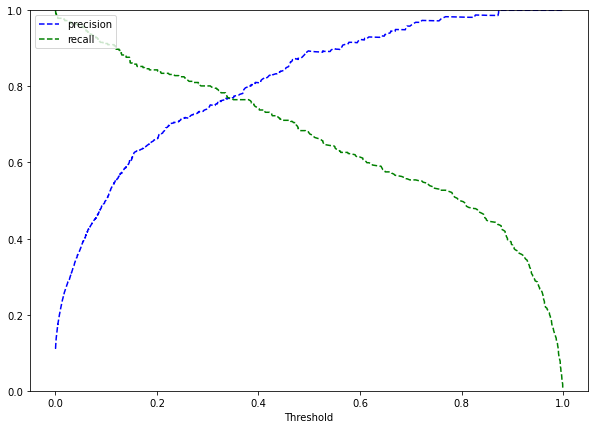

In [91]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.34 we will get balanced precision and recall 

In [92]:
# setting the threshold
optimal_threshold_curve = 0.34

#### Checking model performance on training set

**Using the model with threshold of 0.34**

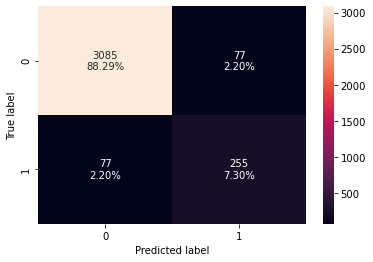

In [93]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [94]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.955924,0.768072,0.768072,0.768072


#### Checking model performance on test set

**Using the model with threshold of 0.34**

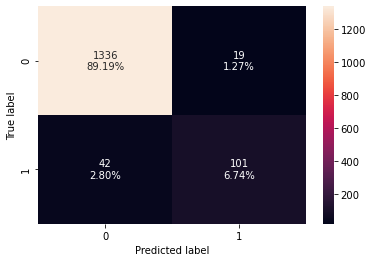

In [95]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [96]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.959279,0.706294,0.841667,0.768061


#### Observations

* With this 0.34 Threshold, the False negative cases have gone up and recall for train & Test set is 0.78 with 95 % accuracy.
* Model has given a balanced performance on Train & Test set with almost same F1 score but Recall dropped
* Model with threshold 0.11 was giving a better Recall.

### Model Performance Summary

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.32 Threshold
Accuracy,0.961362,0.919576,0.955924
Recall,0.674699,0.906627,0.768072
Precision,0.892430,0.546279,0.768072
F1,0.768439,0.681767,0.768072


In [98]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.11 Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.11 Threshold,Logistic Regression-0.32 Threshold
Accuracy,0.959279,0.913885,0.959279
Recall,0.622378,0.881119,0.706294
Precision,0.927083,0.529412,0.841667
F1,0.744770,0.661417,0.768061


### Conclusions from Logistic Regression Model 

* We improved the performance using ROC-AUC curve and optimal threshold .This was best model with high recall. The model achieved a recall of 0.90 on the training set and 0.88 on Test set with optimal threshold set at 0.11.
* Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
* Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.


## Decision Tree Model 

### Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

### Data Preparation 

In [99]:
# Let's first make a new dataframe for modeling by making a copy 
df_dt = df1.copy()

In [100]:
#rechecking the columns list 
df_dt.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County', 'City'],
      dtype='object')

In [101]:
#Let's drop columns which we don't need for modelling
df_dt.drop(columns=["ZIPCode","City",'Experience'], inplace=True)

In [102]:
# confirming if the cols are dropped 
df_dt.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'County'],
      dtype='object')

### Split Data

In [103]:
X = df_dt.drop("Personal_Loan", axis=1)
Y = df_dt["Personal_Loan"]

In [104]:
# creating dummy variables
oneHotCols=['Family','Education','County']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [105]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3494, 51) (1498, 51)


In [106]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3494
Number of rows in test data = 1498


In [107]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.903835
1    0.096165
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.90721
1    0.09279
Name: Personal_Loan, dtype: float64


#### Observation
* We see here the split of Personal_Loan classes is imbalanced. Frequency of class 1 is 10% and the frequency of class 0 is 90%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant classes. We should take care of this by adding class_weight ration and specifying more weightage to class 1.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will purchase a loan but in reality the customer will not - Loss of resources
2. Predicting a customer will not purchase a loan but in reality the customer will buy - Loss of opportunity


### Which Loss is greater ? 

* Loss of opportunity will be the greater loss as the bank will be losing a potential customer.

### How to reduce this loss i.e need to reduce False Negatives ?

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The get_recall_score function will be used to check the model performance of models. 
* The confusion_matrix function will be used to plot confusion matrix.

In [108]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [109]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [110]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [111]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4992 non-null   int64   
 1   Income              4992 non-null   int64   
 2   Family              4992 non-null   category
 3   CCAvg               4992 non-null   float64 
 4   Education           4992 non-null   category
 5   Mortgage            4992 non-null   int64   
 6   Personal_Loan       4992 non-null   category
 7   Securities_Account  4992 non-null   category
 8   CD_Account          4992 non-null   category
 9   Online              4992 non-null   category
 10  CreditCard          4992 non-null   category
 11  County              4992 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 269.1+ KB


In [112]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [113]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking model performance on training set

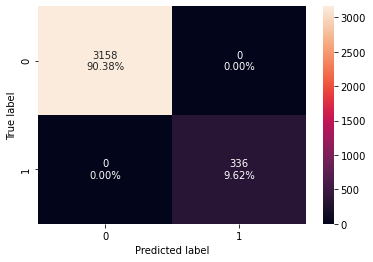

In [114]:
confusion_matrix_sklearn(model, X_train, y_train)

In [115]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

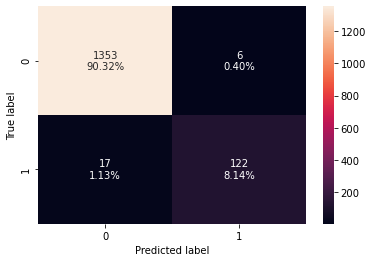

In [116]:
confusion_matrix_sklearn(model, X_test, y_test)

In [117]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8776978417266187


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

### Visualizing the Decision Tree

In [118]:
## creating a list of column names
feature_names = X_train.columns.to_list()

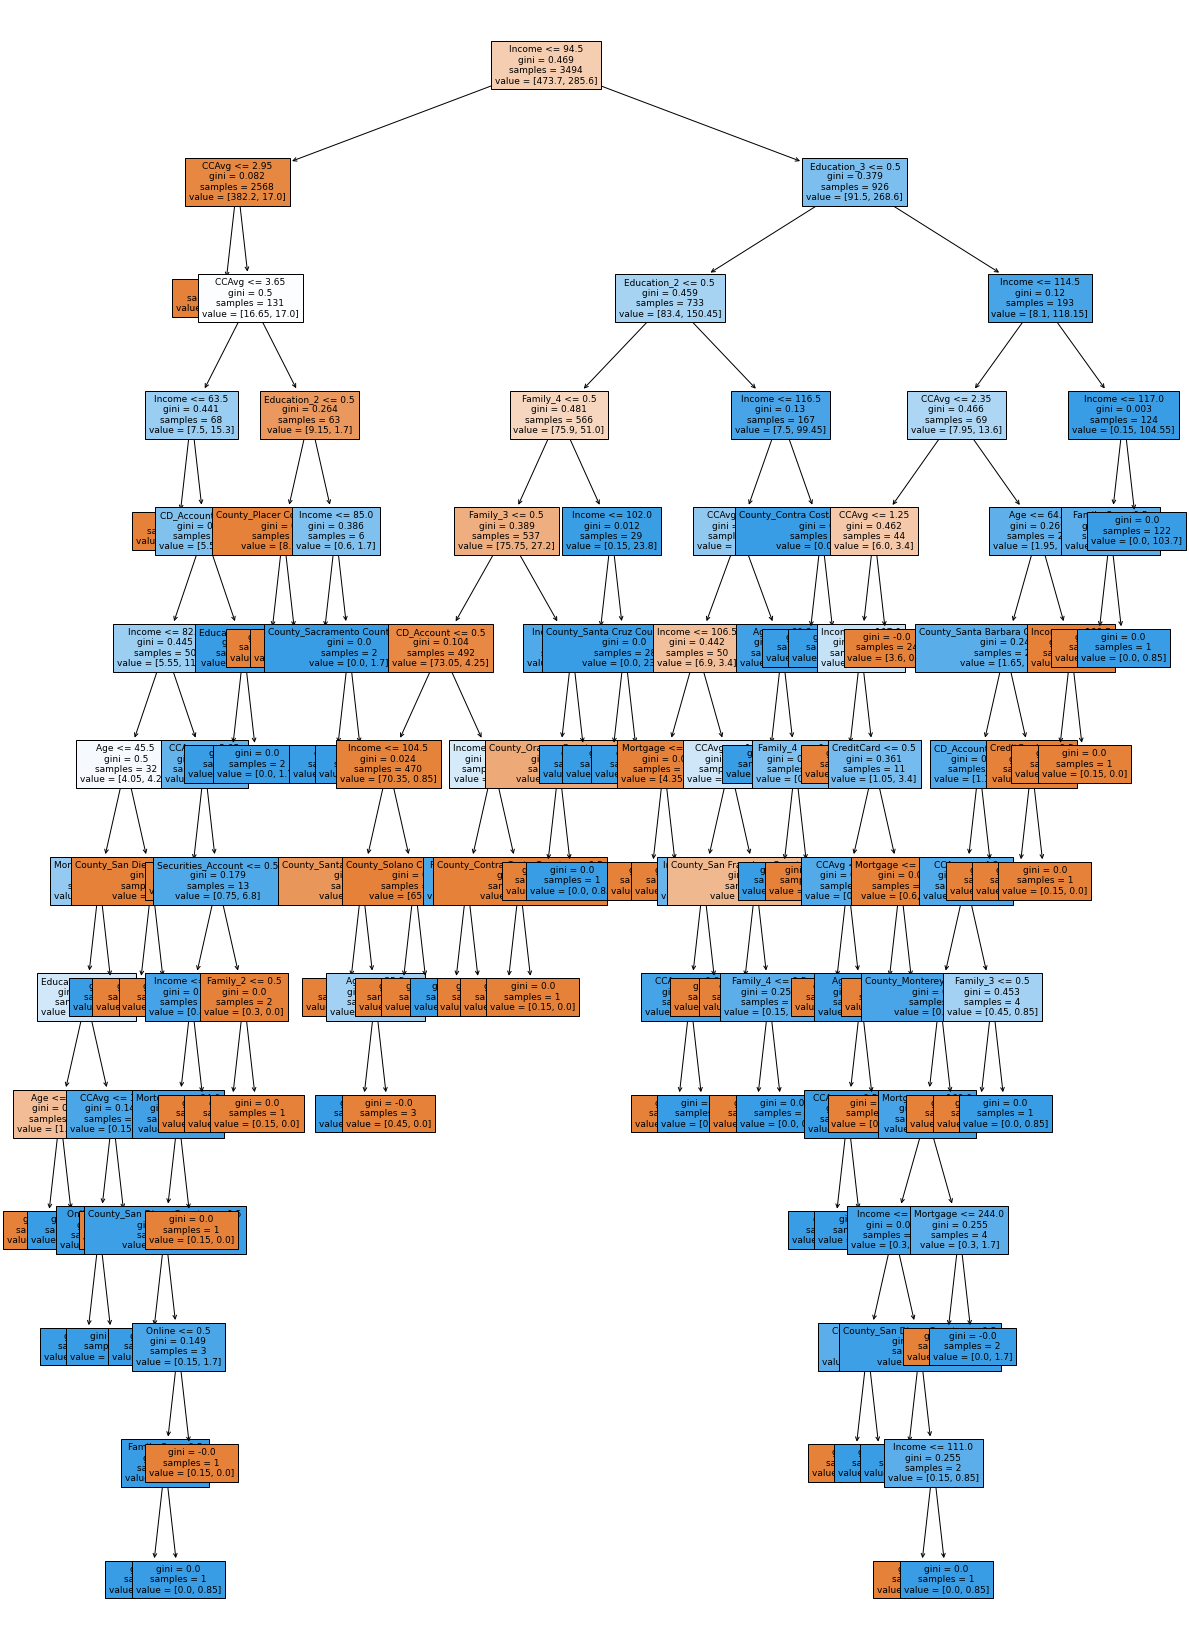

In [119]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [120]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [365.55, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 3.65
|   |   |   |--- Income <= 63.50
|   |   |   |   |--- weights: [1.95, 0.00] class: 0
|   |   |   |--- Income >  63.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |   |   |--- Mortgage <= 204.50
|   |   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.80, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 

* The tree above is very complex and difficult to interpret.

In [121]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
Income                         5.890546e-01
Education_2                    9.854709e-02
CCAvg                          8.875117e-02
Family_3                       7.859218e-02
Family_4                       6.124220e-02
Education_3                    3.936327e-02
CD_Account                     1.216957e-02
Age                            1.178785e-02
Mortgage                       3.633465e-03
County_Orange County           3.628325e-03
County_San Francisco County    2.606779e-03
County_Santa Clara County      2.437711e-03
CreditCard                     2.272167e-03
Family_2                       1.547214e-03
Securities_Account             1.422348e-03
County_Santa Barbara County    1.279891e-03
Online                         7.736068e-04
County_Monterey County         7.323553e-04
County_San Diego County        1.581998e-04
County_Contra Costa County     3.359165e-16
County_Solano County           2.642749e-16
County_Santa Cruz County       1

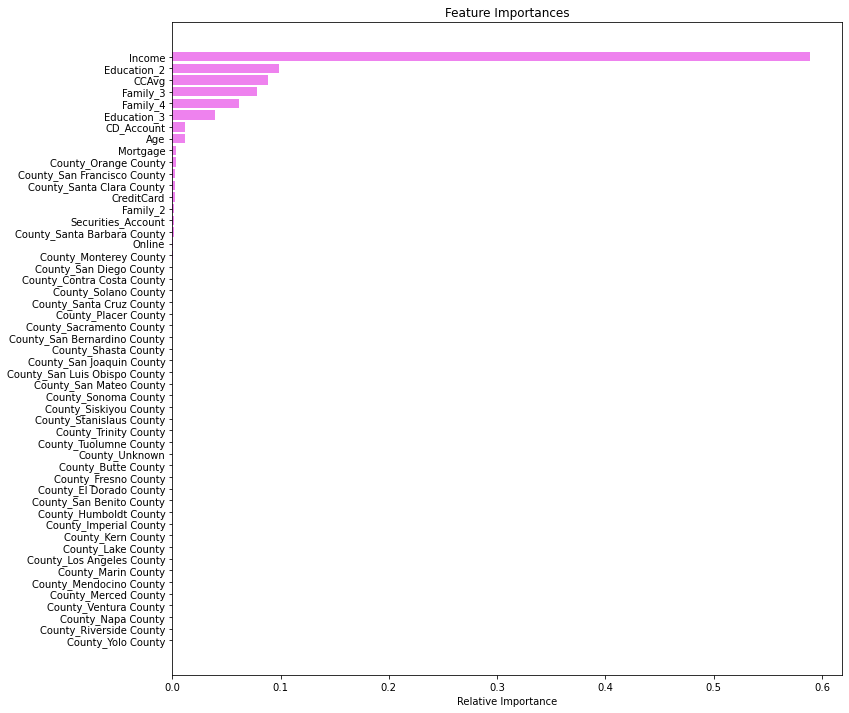

In [122]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the Personal Loan.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [123]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

#### Checking performance on training set

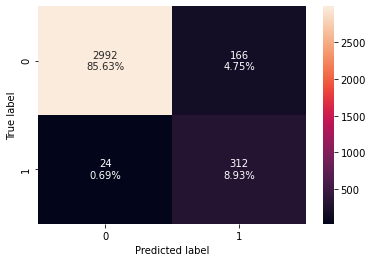

In [124]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [125]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9285714285714286


#### Checking performance on test set

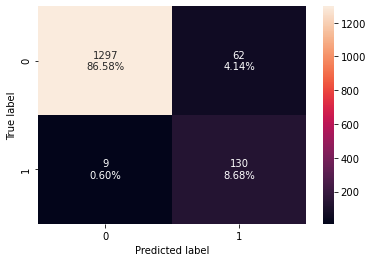

In [126]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [127]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.935251798561151


* Using GridSearch, With Hyperparameter pre pruning (max_depth=10), the model is giving a generalized result now.
* Recall on Train set is 0.92 and on Test set is 0.93
* The False Negatives on the Test data dropped to 9 which is really good as we don't want to loose the opportunity of identifying a potential customer.  

### Visualizing the Decision Tree

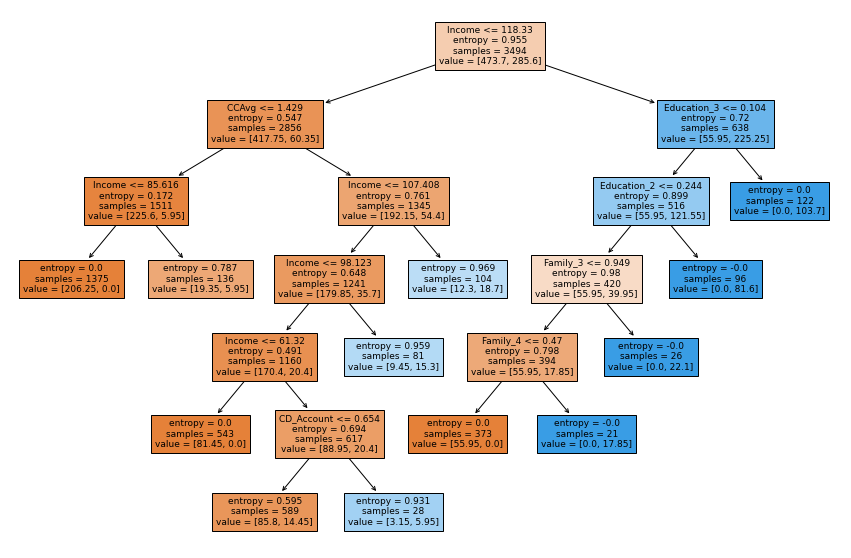

In [128]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [129]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 118.33
|   |--- CCAvg <= 1.43
|   |   |--- Income <= 85.62
|   |   |   |--- weights: [206.25, 0.00] class: 0
|   |   |--- Income >  85.62
|   |   |   |--- weights: [19.35, 5.95] class: 0
|   |--- CCAvg >  1.43
|   |   |--- Income <= 107.41
|   |   |   |--- Income <= 98.12
|   |   |   |   |--- Income <= 61.32
|   |   |   |   |   |--- weights: [81.45, 0.00] class: 0
|   |   |   |   |--- Income >  61.32
|   |   |   |   |   |--- CD_Account <= 0.65
|   |   |   |   |   |   |--- weights: [85.80, 14.45] class: 0
|   |   |   |   |   |--- CD_Account >  0.65
|   |   |   |   |   |   |--- weights: [3.15, 5.95] class: 1
|   |   |   |--- Income >  98.12
|   |   |   |   |--- weights: [9.45, 15.30] class: 1
|   |   |--- Income >  107.41
|   |   |   |--- weights: [12.30, 18.70] class: 1
|--- Income >  118.33
|   |--- Education_3 <= 0.10
|   |   |--- Education_2 <= 0.24
|   |   |   |--- Family_3 <= 0.95
|   |   |   |   |--- Family_4 <= 0.47
|   |   |   |   |   |--- weights: [55.95, 0.00] c

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer has an Annual Income greater than 98K USD and credit card average monthly spending is greater than 1.4K USD  and the customer has an Education with at least a Graduation/Advanced/Professional and has a family size of greater than 2 (3 or 4) then the customer will be more likely purchasing a loan. But if the customer's has an Annual income less than 118K USD and credit card average monthly spending is less than 1.4K USD and has an Education of Undergraduate only and is a single customer or a cuple, then that customer will be less likely purchasing a loan. 

In [130]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                    Imp
Income                         0.581625
Education_2                    0.112462
Family_4                       0.100942
Education_3                    0.073407
Family_3                       0.060088
CCAvg                          0.058114
CD_Account                     0.013362
Age                            0.000000
County_San Mateo County        0.000000
County_San Luis Obispo County  0.000000
County_San Joaquin County      0.000000
County_San Francisco County    0.000000
County_Santa Clara County      0.000000
County_San Diego County        0.000000
County_San Bernardino County   0.000000
County_San Benito County       0.000000
County_Santa Barbara County    0.000000
County_Solano County           0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Riverside County        0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000


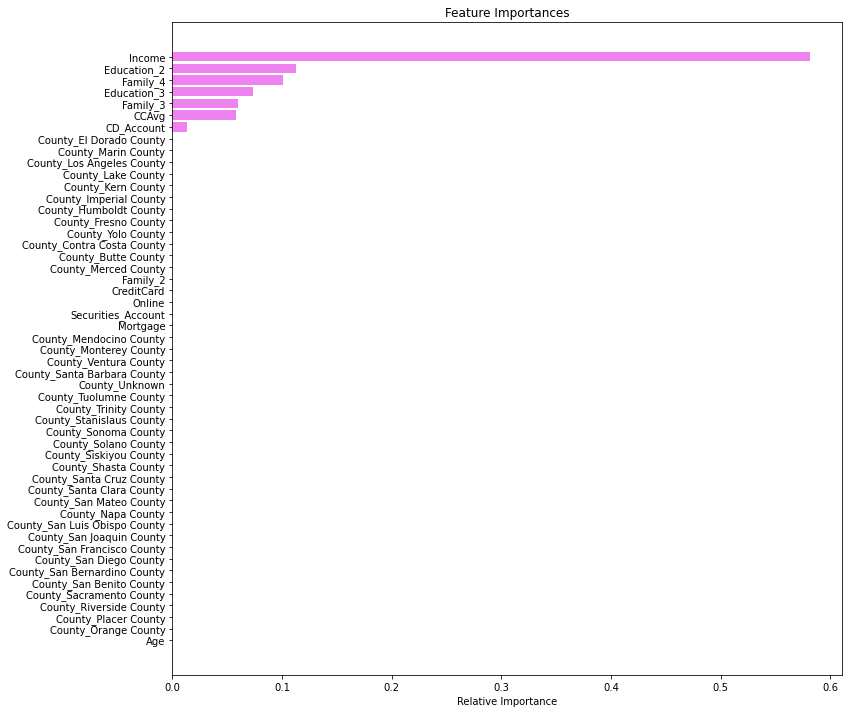

In [131]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree also Income is the most important feature followed by Graduate Education

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [132]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [133]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-8.794537e-15
1,7.457049e-19,-8.793791e-15
2,7.457049e-19,-8.793045e-15
3,7.457049e-19,-8.792300e-15
4,1.228220e-18,-8.791071e-15
5,1.491410e-18,-8.789580e-15
6,1.754600e-18,-8.787825e-15
7,2.324845e-18,-8.785501e-15
8,2.324845e-18,-8.783176e-15
9,5.000609e-18,-8.778175e-15


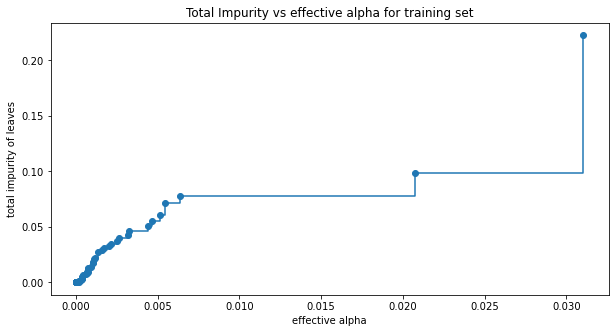

In [134]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [135]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24667278386390143


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

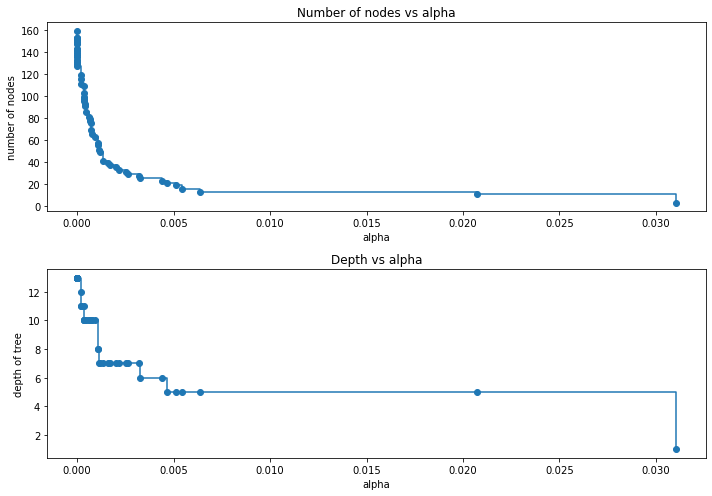

In [136]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [137]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [138]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [139]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

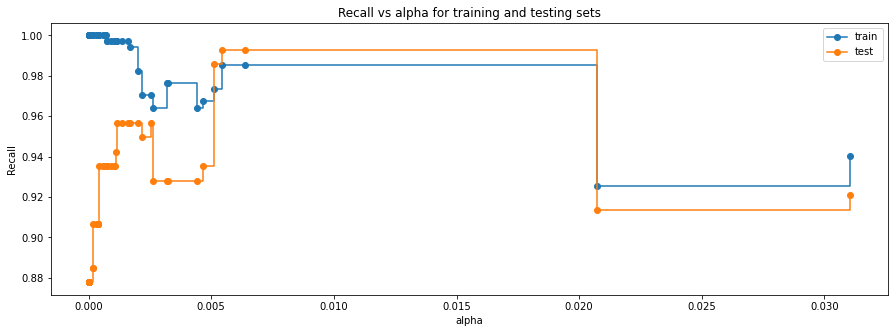

In [140]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.030 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.005 retaining information and getting higher recall.**

In [141]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.005428335974840549,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [142]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005428335974840549,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### checking performance on training set

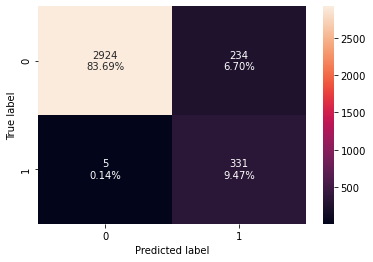

In [143]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [144]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9851190476190477


In [145]:
#### checking performance on test set

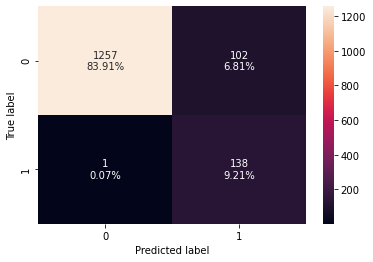

In [146]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [147]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9928057553956835


### Visualizing the Decision Tree

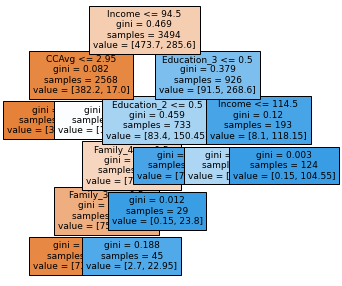

In [148]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.005 ccp_alpha**

In [149]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.005, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

#### Checking performance on the training set

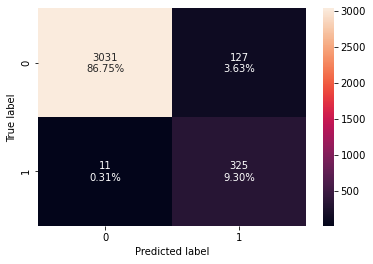

In [150]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [151]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9672619047619048


#### Checking performance on the test set

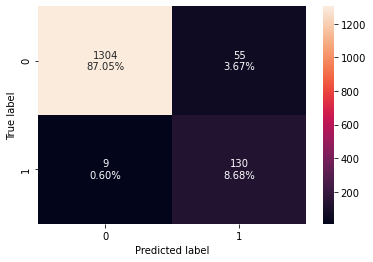

In [152]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [153]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.935251798561151


* With post pruning, the results have improved from the initial model. Recall on Train set is 0.96 and on Test set is 0.93
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.
* The false negatives is still lower, 9, same as hyperparameter tuned model. 

### Visualizing the Decision Tree

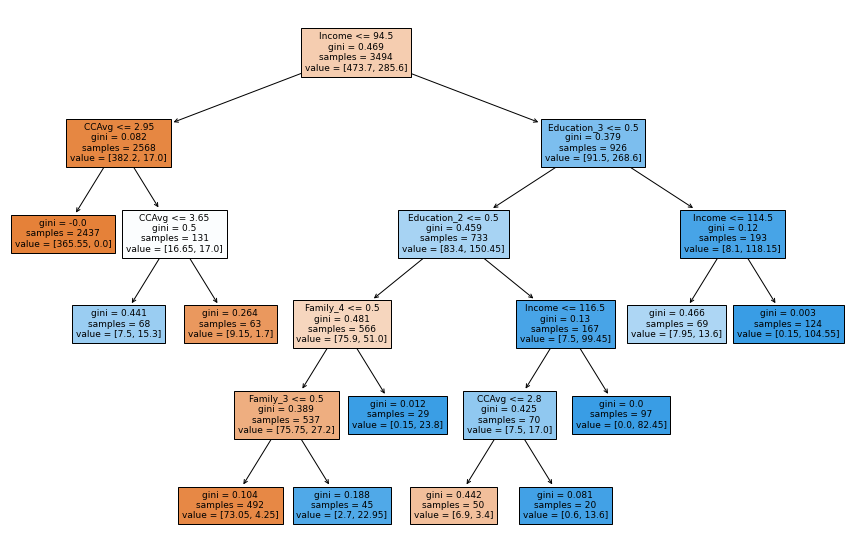

In [154]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [155]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [365.55, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 3.65
|   |   |   |--- weights: [7.50, 15.30] class: 1
|   |   |--- CCAvg >  3.65
|   |   |   |--- weights: [9.15, 1.70] class: 0
|--- Income >  94.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- weights: [73.05, 4.25] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- weights: [2.70, 22.95] class: 1
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- weights: [0.15, 23.80] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- CCAvg <= 2.80
|   |   |   |   |   |--- weights: [6.90, 3.40] class: 0
|   |   |   |   |--- CCAvg >  2.80
|   |   |   |   |   |--- weights: [0.60, 13.60] class: 1
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 82.45] class: 1
|   |

In [156]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Income                         0.622707
Education_2                    0.102978
Family_3                       0.086446
CCAvg                          0.077407
Family_4                       0.065820
Education_3                    0.044642
Age                            0.000000
County_Santa Clara County      0.000000
County_San Benito County       0.000000
County_San Bernardino County   0.000000
County_San Diego County        0.000000
County_San Francisco County    0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
County_Santa Barbara County    0.000000
County_Siskiyou County         0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Riverside County        0.000000
County_Solano County           0.000000
County_Sonoma County           0.000000
County_Stanislaus County       0.000000
County_Trinity County          0.000000


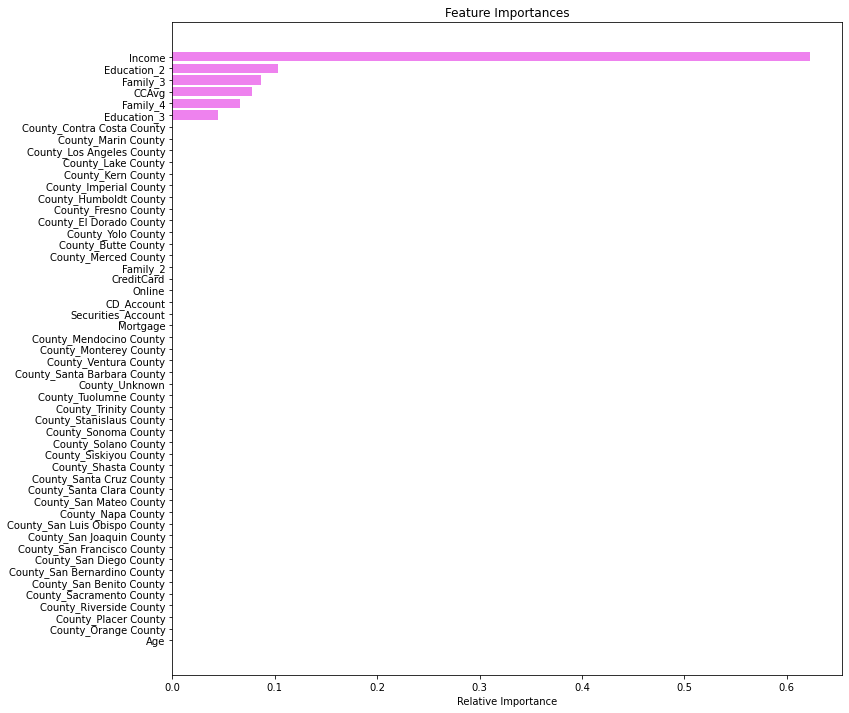

In [157]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income and Graduate Education are the top two important features to predict customer purchasing a loan.

### Comparing all the decision tree models

In [158]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.928571
2,0.967262


In [159]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.877698
1,0.935252
2,0.935252


#### Observation
* Decision tree model with post-pruning has given the best recall score, 0.96 on training data.
* Both Tuned/pre-prunning and post-pruning has given almost same Recall of 0.93 on Test data
* The Tuned/pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.
* Both Tuned/pre-pruning reduced the false Negatives to 9, which is good as we don't want to loose opportunity in predicting the potential customers purchasing a loan.
* The False Positives with Tuned/pre-pruning model was 62 and with post-pruning reduced to 55. The False positives should be lower to reduce the loss of resources. 
* Overall, post-pruning is giving us a better model with best recall (0.93), low False ngatives and low False positives. 

### Conclusions from Decision Tree Model 

- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- Income, Education (Graduate/Advanced), CCAvg (Monthly credit card average spending), Family (size of greater than 2 ) and CD_Account (customers having Ceritificate of Deposit with the bank) are the most important variables in predicting the customers that will be purchasing a Personal_Loan 
- We established the importance of hyper-parameters pre-pruning / post-pruning to reduce overfitting.
    * With HyperParameter tuned model (max_depth=10) and post-pruning model , the overfitting on train has reduced and the False Negatives also dropped which is great to reduce the loss of opportunity in predicting the potential customers purchasing a loan.. 
    * Both pre-pruning/hyperparameter tuned model and post-pruning model gave almost same best Recall,0.93, on Test data.
- Since post pruning  helped in reducing False positives and false Negatives and gave comparable Recall  with Hyperparamter Hyperparameter Tuned model, we choose  post-pruning as the best model for this dataset in predicting the customers likely to purchasing a loan.   


### Overall Conclusion 

* Using different models like Logistic Regression and Decision Tree Classifier we build a model to predict the probability of Customer purchasing a Loan.
* First we built model using Logistic Regression and performance metric used was Recall. Income,Graduate & Advanced Education, CCAvg ,Family and CD_Account are the most important features in predicting if the customers will purchase a personal loan.
    * We improved the performance using ROC-AUC curve and with optimal threshold of 0.11 .This was best model with high recall. The model achieved a recall of 0.90 on the training set and 0.88 on Test set.
    * Coefficient of Income, Graduate and Advanced Education, Family_3,Family_4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
    * Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.

* Second, we built model using Decsision Tree and performance metric used was Recall. Decision tree can easily overfit. They require less datapreprocessing compared to logistic Regression and are easy to understand.
    * We used prepruning and post pruning to reduce the overfitting
    * Post-pruning model gave best 96 % Recall with 97% accuracy, helped in lower False Negatives (reducing the loss of opportunity in predicting the potential customers purchasing a loan.) and also False Positives (reducing the loss of resources)
    * Income,Graduate & Advanced Education, CCAvg ,Family (size of greater than 2) and CD_Account are some of the most important variables in predicting if the customers will purchase a personal loan.

### Recommendations to the Marketing Team to increase the success ratio of purchasing a Loan 

* In the last campaign, since majority ofcustomers who had taken personal loan were from LosAngeles region, repeat the campaign to target customers from this region. 
* Since in the age group of 30 ~ 60 years, the ratio of borrowing loan is high between 25 and 35, target this age of customers in the campaign to promote personal loans to pay off student loans, house loans
* Since people with higher Mortgages are more likely to purchase a loan, tie up with real estate market to target this segnment of customers to increase the success ratio. 
* Target Customers who have income above 98k USD , with Graduate/Advance level education, with a family of more than 2 because the model shows such customers have higher chances of accepting personal loans. 
* Since Customers who have certificate of deposit with the bank had previously borrowed loan, marketing campaign should target these customers and run promotional events with competetive interest rates for loans.
* Since Majority of customers who did purchase Personal loan with the bank before used Online facilities, marketing should partner with e-commerce marketplaces to implement personal load digital advertising stratergies to put the bank in front of right people at the right time. 
* Since Customers with high Average monthly credit card Spending also play some role in likelihood of buy loan based on the EDA and the two models, partner with credit card companies to provide loan solutions for those who are in credit card debts. 
* Consider Partnerships than can leverage personal loans for alternative offer selling. Partnerships can help scale customer acquisition efforts and generate high-intent leads

